[0.  3.  2.8 2.6 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4]
length of h1 is  15


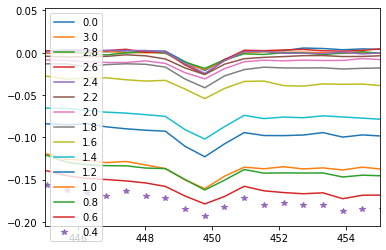

wavelength increment is  0.5757283380782918
target index is  397
 target lambda is  449.774261
 printing a_target_reverse [-0.019714 -0.018452 -0.025516 -0.0244   -0.025735 -0.030843 -0.041335
 -0.054157 -0.101963 -0.122855 -0.16055  -0.162128 -0.178609 -0.192766]


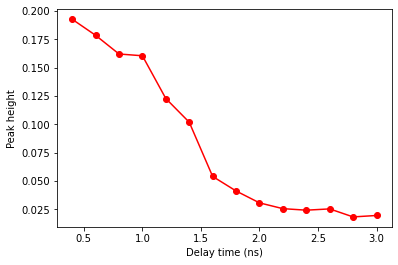

In [25]:
import numpy as np
from scipy import io
from matplotlib import pyplot as plt

# some notes to keep in mind:

# 1. The delay times are written in '18_Rubpy_004_h1.txt'
# 2. The actually data is written in '18_Rubpy_004.txt' with 
#    the wavelength being in column 1 and the absorption 
#    at various delay times being in subsequent columns

# 3. Metal-Ligand charge-transfer transitions occur at about 450 nm, and are expected to
#    show "ground-state bleach" signal (negative)

# 4. Bipyradine transitions occur ~375 nm and is expected to show 
#   "excited-state absorption" signal (positive)

# Question: Can we fit decay constants to each of these signals?  What might these tlook like?


h1 = np.loadtxt('18_Rubpy_004_h1.txt')
h2 = np.loadtxt('18_Rubpy_004_h2.txt')

### a has a row index and a column index
### the column index tells you which waiting time you are refering to 
### OR if column index = 0, it tells you that you are just a wavelength!

### the row index refers to different values of wavelength! 
### e.g. a[0,0] -> lambda = 213 nm
###      a[0, 1] -> A(213 nm) for the first waiting time (0 ps)
###      a[0, 2] -> A(213 nm) for the second waiting time (3 ps)
###      ....
###      a[1,0] -> lambda = 214 nm
####     a[1,1] -> A(214 nm) for the first waiting time
###      a[1,2] -> A(214 nm) for the second waiting time
a = np.loadtxt('18_Rubpy_004.txt') 
print(h1)
print("length of h1 is ",len(h1))


plt.plot(a[:,0], a[:,1], label=str(h1[0]))
plt.plot(a[:,0], a[:,2], label=str(h1[1]))
plt.plot(a[:,0], a[:,3], label=str(h1[2]))
plt.plot(a[:,0], a[:,4], label=str(h1[3]))
plt.plot(a[:,0], a[:,5], label=str(h1[4]))
plt.plot(a[:,0], a[:,6], label=str(h1[5]))
plt.plot(a[:,0], a[:,7], label=str(h1[6]))
plt.plot(a[:,0], a[:,8], label=str(h1[7]))
plt.plot(a[:,0], a[:,9], label=str(h1[8]))
plt.plot(a[:,0], a[:,10], label=str(h1[9]))
plt.plot(a[:,0], a[:,11], label=str(h1[10]))
plt.plot(a[:,0], a[:,12], label=str(h1[11]))
plt.plot(a[:,0], a[:,13], label=str(h1[12]))
plt.plot(a[:,0], a[:,14], label=str(h1[13]))
plt.plot(a[:,0], a[:,15], '*', label=str(h1[14]))
plt.xlim(445,455)
#plt.ylim(0, 0.05)
plt.legend()
plt.show()



dlambda = (a[1404,0] -a[0,0])/(len(a[:,0]-1))
print("wavelength increment is ", (a[1404,0] -a[0,0])/(len(a[:,0]-1)))

### I at first assumed there was linear spacing in lambda, but
### maybe not... nevertheless this gets us a good index
### for the jagged little dip in the GSB feature
target_index = int( (449-a[0,0])/dlambda ) - 11
print("target index is ", target_index)
target_lambda = a[target_index, 0]
print(" target lambda is ", target_lambda)

### ok let's get the difference spectra for those 14 different delay times
a_target_reverse = a[target_index,2:16]

### let's now order them from shortest to longest delay time
### and also multiply the dip value by -1 so we get an exponentially
### decaying jagged little peak
a_target = -1*a_target_reverse[::-1]
print(" printing a_target_reverse", a_target_reverse)

### grab the 14 delay times
h1_reverse = h1[::-1]
### reverse them so that we are going from shortest (0.4 ns)  to longest (3 ns)
### delay
tau = h1_reverse[:14]

### plot magnitude of jagged little dip as a function of delay time
plt.plot(tau, a_target, 'ro-')
plt.xlabel('Delay time (ns)')
plt.ylabel("Peak height")
plt.show()


In [23]:
### we want to fit an exponential to this data...
### we will need a helper function that spits out an exponential
import scipy.optimize
def monoExp(t, m, k, b):
    return m * np.exp(-k * t) + b

Y = 0.32793468347497107 * e^(-0.6283069294799899 * t) + -0.044930209187335875
Tau = 1.5915788177406178 ns


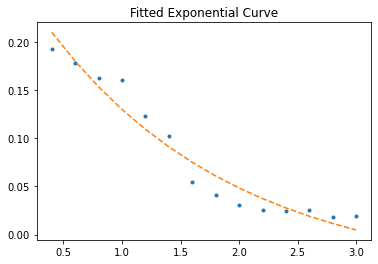

In [26]:
# perform the fit
# just eyeballing the curve, we might guess 
# a prefactor of 0.2 and a decay constant of about 1/2 ns

p0 = (0.2, .5, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, tau, a_target, p0)
m, k, b = params

tau_ns = (1 / k) 


# plot the results
plt.plot(tau,  a_target, '.', label="data")
plt.plot(tau, monoExp(tau, m, k, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{k} * t) + {b}")
print(f"Tau = {tau_ns} ns")